# Weed Matics

In [98]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from spacy.tokenizer import Tokenizer

In [99]:
# loading data
data_in = '../data/cannabis.csv'
df = pd.read_csv(data_in, encoding='utf-8')
df

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...


In [100]:
df.iloc[1]['Strain']

'98-White-Widow'

In [101]:
import random 

def random_this():
    """
    I have a {Type} called {Strain}, it has {flavor} flavor profile.
    """
    random_herb = df.iloc[random.randrange(len(df))]
    
    output = {
    'Strain' : random_herb["Strain"],
    'Type' : random_herb["Type"],
    'Effects' : random_herb['Effects']
    }
    return output

random_this()

{'Strain': 'Cbd-Mango-Haze',
 'Type': 'sativa',
 'Effects': 'Focused,Relaxed,Uplifted,Energetic,Euphoric'}

In [102]:
random_herb['Flavor']

'Sweet,Vanilla,Pungent'

In [103]:
random_herb['Flavor']

'Sweet,Vanilla,Pungent'

In [104]:
data = df[df['Description'].notna()]['Effects']
dataa = df[df['Description'].notna()]
data

0       Creative,Energetic,Tingly,Euphoric,Relaxed
1         Relaxed,Aroused,Creative,Happy,Energetic
2        Uplifted,Happy,Relaxed,Energetic,Creative
3          Tingly,Creative,Hungry,Relaxed,Uplifted
4        Happy,Relaxed,Euphoric,Uplifted,Talkative
                           ...                    
2346     Happy,Uplifted,Relaxed,Euphoric,Energetic
2347        Relaxed,Happy,Euphoric,Uplifted,Sleepy
2348       Relaxed,Sleepy,Talkative,Euphoric,Happy
2349          Relaxed,Sleepy,Euphoric,Happy,Hungry
2350          Hungry,Relaxed,Uplifted,Happy,Sleepy
Name: Effects, Length: 2318, dtype: object

In [105]:
# Vector Representation
# ability to search Strains based off of Desired Effects
vect = CountVectorizer(stop_words='english', max_features=100)

# Learn our vocabulary
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())


C:\Users\corte\anaconda3\envs\002-natlang\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


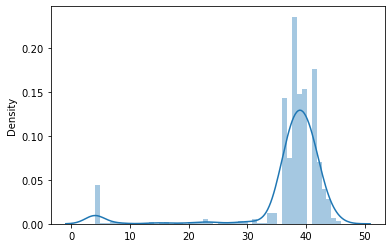

In [106]:
doc_len = [len(doc) for doc in data]
import seaborn as sns

sns.distplot(doc_len);

In [107]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
nlp = spacy.load("en_core_web_lg")
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),

                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,arouse,arouse creative,arouse energetic,arouse euphoric,arouse focus,arouse happy,arouse hungry,arouse relaxed,arouse sleepy,arouse talkative,...,uplifted euphoric,uplifted focus,uplifted focused,uplifted giggly,uplifted happy,uplifted hungry,uplifted relaxed,uplifted sleepy,uplifted talkative,uplifted tingly
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.37755,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.598341,0.0


In [109]:
from sklearn.neighbors import NearestNeighbors
# Knn state to save model and reduce computation time
class KnnState(object):
    def __init__(self):
        self._nn = "state"
        
    @property
    def test(self):
        return self._nn
    
    @test.setter
    def test(self, value):
        self._nn = value

In [110]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')

KNN = KnnState()
KNN.nn = nn.fit(dtm)
KNN.nn

NearestNeighbors(algorithm='kd_tree')

In [111]:
review = ["""Happy"""]

In [112]:
new = tfidf.transform(review)

In [113]:
neighbors = KNN.nn.kneighbors(new.todense())
neighbors

(array([[0., 1., 1., 1., 1.]]),
 array([[2272, 1717, 1730, 1753, 1722]], dtype=int64))

In [119]:
neighbors[1][0].tolist()
for i, x in enumerate(neighbors[1][0].tolist()):
    print(data[x])

Relaxed,Euphoric,Uplifted,Creative,Happy
Euphoric,Uplifted,Creative,Happy,Aroused
Relaxed,Euphoric,Hungry,Happy,Creative
Relaxed,Sleepy,Uplifted,Hungry,Happy
Happy,Euphoric,Energetic,Relaxed,Creative


In [120]:
dataa[dataa.index == 1628]

,Strain,Type,Rating,Effects,Flavor,Description
1628,Platinum-Huckleberry-Cookies,hybrid,4.8,"Euphoric,Relaxed,Happy,Tingly,Creative","Pine,Spicy/Herbal,Minty",Platinum Huckleberry Cookies by Dynasty Seeds ...


In [121]:
dataa

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...


In [132]:
find_strain = lambda alpha: dataa[dataa.index == alpha]['Strain'].tolist()[0]

find_strain(1628)

'Platinum-Huckleberry-Cookies'

In [123]:
dataa.to_csv('cannabis.csv')

## Writing Pickle file

In [124]:
import pickle

filehandler = open('model.pickle', 'wb')
pickle.dump(KNN.nn, filehandler)
filehandler.close()

## Reading Pickle file

In [81]:
import pickle

infile = open('model.pickle','rb')
new_dict = pickle.load(infile)
new_dict



NearestNeighbors(algorithm='kd_tree')

In [90]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

nlp = spacy.load("en_core_web_lg")
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        tokenizer=tokenize)



In [116]:
new_dict.kneighbors(new.todense())

(array([[0., 1., 1., 1., 1.]]),
 array([[2272, 1717, 1730, 1753, 1722]], dtype=int64))